<a href="https://colab.research.google.com/github/michellssgui22/PROJETOS_ESTUDO/blob/main/Mini_Projeto_Roof_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto - Roof Imóveis
### Michel Souza Santana - 13923
> Entrega 01 - Slot 03

## Contextualização
* Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, ela contratou você para uma consultoria estratégica.
* A empresa irá investir em imóveis no Condado de County, nos Estados
Unidos.
* Utilizando o dataset disponibilizado, você irá aplicar os conceitos de
CRISP-DM aprendidos até o momento em um projeto prático, que busca
desenvolver seu pensamento analítico, insights e tomada de decisões.

## King County - Condado de King - Washington
* O Condado de King é um dos 39 condados do estado americano de
Washington. A sede e cidade mais populosa do condado é Seattle.
* Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo
com o censo nacional de 2020, é o condado mais populoso do estado e o 12o
mais populoso do país. Wikipédia
* O Dataset apresenta a venda de imóveis e suas características na região
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total
de 21 atributos.

> Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

> Dataset detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

### 1.2 Descrevendo os dados:
O Dataset objeto deste jupyter notebook é referente aos dados de venda de imóveis em *King's County*, condado do estado americano de Washington, entre maio de 2014 e maio de 2015.

Segue a descrição dos dados contindos no referido dataset:

variável | Descrição
----|----
id |	Número de identificação do imóvel
date |	Data da venda
price |	Preço do imóvel na venda
bedrooms |	Número de quartos
bathrooms |	Número de banheiros
sqft_liv |	Tamanho da área habitável, em pés quadradps (square feet).
sqft_lot |	Tamanho do lote do imóvel, em pés quadradps (square feet).
floors | 	Número de andares
waterfront |	Classificação de beira-mar. ‘1’ se a propriedade é beira-mar, ‘0’ em caso negativo.
view |	Classificação de 0 a 4 do quão boa é a visão da propriedade.
condition |	Condição do imóvel, classificado de 1 a 5.
grade |	Classificação da qualidade da construção e materiais. Indicadores de 1 a 13. Mais informações no site governamental do [condado](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g).
sqft_above |	Área de construção acima do térreo.
sqft_basmt |	Área de construção abaixo do solo.
yr_built |	Ano de construção.
yr_renov |	Ano de renovação. '0' se nunca renovado.
zipcode |	Código postal americano contendo 5 dígitos.
lat |	Latitude.
long |	Longitude.
squft_liv15 |	Média de tamanho interior das 15 casas mais próximas, em pés quadrados.
squft_lot15 |	Média de tamanho dos lotes das 15 casas mais próximas, em pés quadrados.


## O Que Devo Fazer?
* A empresa te contratou pois quer saber qual seria os 5 imóveis que
ela deveria investir e o porquê e quais 5 você não recomendaria o
investimento de jeito nenhum.
* Você deve montar um colab bem redigido mostrando o passo a
passo das etapas de análise do case, fazendo uma introdução e dados
atuais sobre o problema.
* Também é importante ressaltar/explicar passagens complexas
ou insights que você tiver durante a resolução desse projeto.

## A Questão de Negócio:

#### Qual a meta?
* Identificar os 5 imóveis mais valorizados e destacar sua cidade

#### Como posso chegar?
* Analisando os dados estarei verificando os imóveis que tiveram mais de uma venda e analizando se no decorrer do tempo houve valorização ou desvalorização deste.

## Entendimento do Negócio:

#### Quais dados eu tenho disponível?
* Dados colhidos junto ao site da Kaglle
> https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/download?datasetVersionNumber=1

#### Eles são relevantes para o problema?
* A principio, sim. Percebe-se logo no inicio a necessidade de tratamento de algumas colunas e talvêz a agregação de mais dados para localização e identificação das cidades.

#### Eles me trazem uma solução direta?
* Não, precisão ser analizados, filtrados e organizados.

#### Qual o meu setor ou range de negócio?
* Imobiliário

## A Coleta de Dados:

In [1491]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importadas as bibliotecas, realizamos a visualização de parte do Dataframe, a fim de verificarmos o formato e disposição dos dados:

In [1492]:
# importando dataframe com pandas, declarando a variável "df" como nosso dataframe principal do projeto.
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Limpeza dos Dados

* Verificando quantidade de linhas e colunas existentes na tabela

In [1493]:
df.shape

(21613, 21)

* Verificando a existência de dados nulos

In [1494]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* Descrevendo os dados para melhor compreenção e caso possível ja realizar a verificação de possíveis outliers.

In [1495]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1496]:
print(f'numeor máximo de banheiros: ', df['bedrooms'].max())
print(f'numeor mínimo de banheiros: ', df['bedrooms'].min())

numeor máximo de banheiros:  33
numeor mínimo de banheiros:  0


> Aqui já se percebe alguns dados a serem tratatos como a existência de 33 banheiros em uma casa e em outra 0.

## Criando um novo DF com as colunas essenciais para nálise

In [1497]:
colunas = ['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
df_imob = df.loc[:, colunas] 
df_imob.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,1180,5650,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,2570,7242,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,770,10000,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,1960,5000,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,1680,8080,0,3,8,1987,0,98074,47.6168,-122.045


## Encontre a cidade de cada imóvel;


In [1498]:
import requests

# definindo a url alvo da nossa pesquisa

url = 'https://www.zipdatamaps.com/king-wa-county-zipcodes'

# definindo nossa Header, que servir de identificação como um navegador
# comum, e não do pandas.

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#   Enviando o o pedido ao site, dessa vez apontando nosso Header, e nos identificando
# como navegador.

r = requests.get(url, headers=header)


df_zip_city = pd.read_html(r.text)


#  importado todos os dados da html que foram interpretados pelo pandas como df.
#Agora iremos achar tabela de nosso interesse, que está dentro da lista de
#objetos:

df_zip_city = df_zip_city[1]
df_zip_city

#   Na verdade nossa tabela está dentro de uma coluna de uma tabela maior. 
#Iremos extraí-la de lá com a seguinte linha de código:

df_zip_city = df_zip_city['List of All Zipcodes in King County, Washington']

#   Vamos aproveitar pra tirar os dados que não são úteis. Vamos dropar as colunas
# População e Zip-Type, bem como renomear as colunas úteis (Cidade e Código postal).

# Por fim, iremos transformar a coluna de zipcode em números inteiros, uma vez que
#não iremos usá-los para operações, e o float point pode ser problemático futuramente.

df_zip_city.drop(['Population', 'ZIP Type'], axis=1, inplace=True)
df_zip_city.dropna(axis=0, inplace=True)
df_zip_city['ZIP Code'] = df_zip_city['ZIP Code'].astype(int)
df_zip_city.columns = ['Zip Code', 'City']

# Anexando colunas com as respectivas cidades na tabela
df_imob['city'] = df_imob['zipcode'].map(df_zip_city.set_index('Zip Code')['City'])
df_imob.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city
0,7129300520,20141013T000000,221900.0,1180,5650,0,3,7,1955,0,98178,47.5112,-122.257,Seattle
1,6414100192,20141209T000000,538000.0,2570,7242,0,3,7,1951,1991,98125,47.7210,-122.319,Seattle
2,5631500400,20150225T000000,180000.0,770,10000,0,3,6,1933,0,98028,47.7379,-122.233,Kenmore
3,2487200875,20141209T000000,604000.0,1960,5000,0,5,7,1965,0,98136,47.5208,-122.393,Seattle
4,1954400510,20150218T000000,510000.0,1680,8080,0,3,8,1987,0,98074,47.6168,-122.045,Sammamish


## Calcule o preço por área de imóvel;


In [1499]:
df_imob['price_for_area_lot'] = (df_imob['price'] / df_imob['sqft_lot'])
df_imob['price_for_area_lot'].astype(float)
df_imob.head()


,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
0,7129300520,20141013T000000,221900.0,1180,5650,0,3,7,1955,0,98178,47.5112,-122.257,Seattle,39.274336
1,6414100192,20141209T000000,538000.0,2570,7242,0,3,7,1951,1991,98125,47.7210,-122.319,Seattle,74.288870
2,5631500400,20150225T000000,180000.0,770,10000,0,3,6,1933,0,98028,47.7379,-122.233,Kenmore,18.000000
3,2487200875,20141209T000000,604000.0,1960,5000,0,5,7,1965,0,98136,47.5208,-122.393,Seattle,120.800000
4,1954400510,20150218T000000,510000.0,1680,8080,0,3,8,1987,0,98074,47.6168,-122.045,Sammamish,63.118812


## Calcule o lucro/ perda de investimento caso o imóvel seja vendido mais de uma vez naquele período.

## Formatando a coluna date para melhor interação sobre os dados

In [1500]:
df_imob['date'] = pd.to_datetime(df_imob['date'])
df_imob.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
0,7129300520,2014-10-13,221900.0,1180,5650,0,3,7,1955,0,98178,47.5112,-122.257,Seattle,39.274336
1,6414100192,2014-12-09,538000.0,2570,7242,0,3,7,1951,1991,98125,47.7210,-122.319,Seattle,74.288870
2,5631500400,2015-02-25,180000.0,770,10000,0,3,6,1933,0,98028,47.7379,-122.233,Kenmore,18.000000
3,2487200875,2014-12-09,604000.0,1960,5000,0,5,7,1965,0,98136,47.5208,-122.393,Seattle,120.800000
4,1954400510,2015-02-18,510000.0,1680,8080,0,3,8,1987,0,98074,47.6168,-122.045,Sammamish,63.118812


## Contando quantas vezes os imoveis com duplas vendas aparencem

In [1501]:
df_vendas = df_imob[df_imob.duplicated(subset=['id'], keep=False)]
df_vendas.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
93,6021501535,2014-07-25,430000.0,1580,5000,0,3,8,1939,0,98117,47.6870,-122.386,Seattle,86.000000
94,6021501535,2014-12-23,700000.0,1580,5000,0,3,8,1939,0,98117,47.6870,-122.386,Seattle,140.000000
313,4139480200,2014-06-18,1384000.0,4290,12103,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,114.351814
314,4139480200,2014-12-09,1400000.0,4290,12103,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,115.673800
324,7520000520,2014-09-05,232000.0,1240,12092,0,3,6,1922,1984,98146,47.4957,-122.352,Seattle,19.186239


In [1502]:
df_vendas[df_vendas.id.duplicated(keep=False)]['id'].value_counts(sort=True)

795000620     3
6021501535    2
3935900232    2
1217000340    2
9238500040    2
             ..
2621600015    2
2206700215    2
2787460720    2
3883800011    2
7853420110    2
Name: id, Length: 176, dtype: int64

In [1503]:
df_vendas[df_vendas['id'] == 8832900780]['price']

6434    480000.0
6435    647500.0
Name: price, dtype: float64

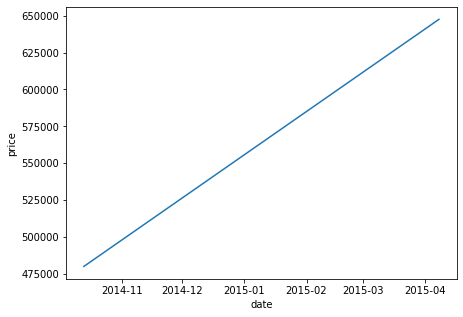

In [1504]:
plt.figure(figsize=(7,5))
sns.lineplot(y='price', x='date', data=df_vendas[df_vendas['id'] == 8832900780]);

In [1505]:
df_vendas[df_vendas['id'] == 4204400098]['price']

5272    250000.0
5273    385000.0
Name: price, dtype: float64

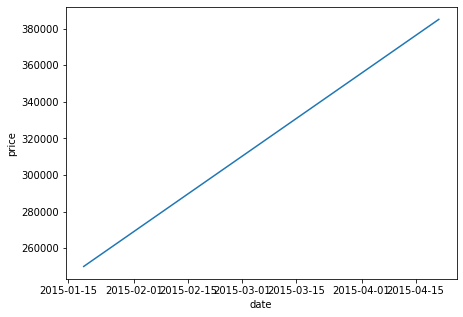

In [1506]:
plt.figure(figsize=(7,5))
sns.lineplot(y='price', x='date', data=df_vendas[df_vendas['id'] == 4204400098]);

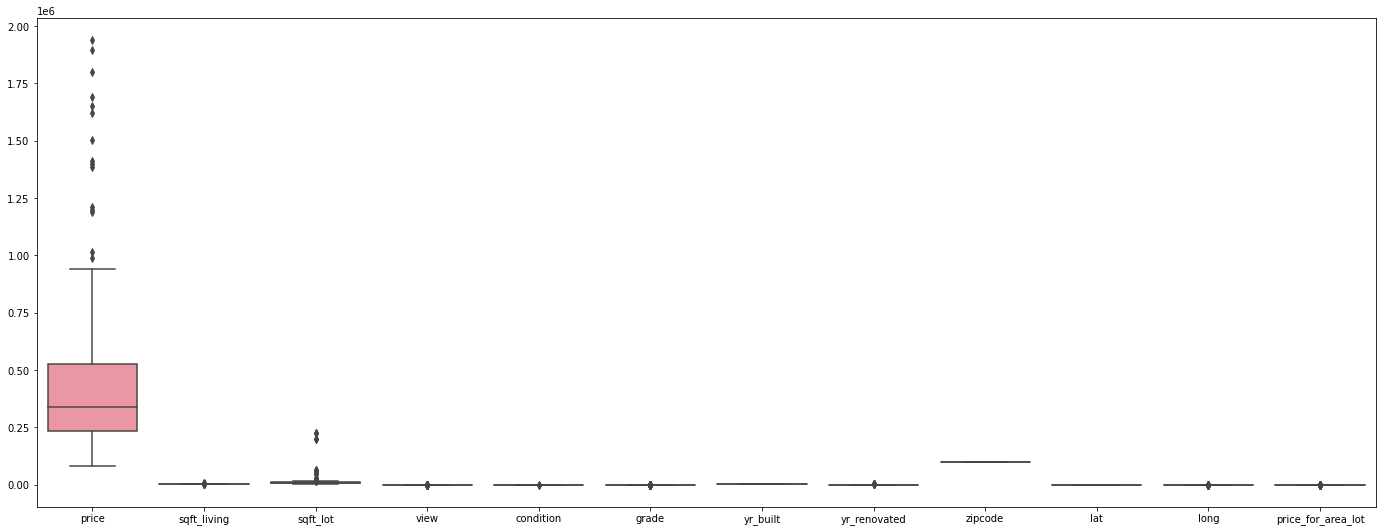

In [1507]:
plt.figure(figsize=(24, 9))
sns.boxplot(data=df_vendas.drop('id', axis=1));

In [1508]:
df_vendas['city'].unique()

array(['Seattle', 'Bellevue', 'Redmond', 'Renton', 'Issaquah', 'Kent',
       'North Bend', 'Auburn', 'Federal Way', 'Sammamish', 'Medina',
       'Fall City', 'Maple Valley', 'Kenmore', 'Snoqualmie', 'Bothell',
       'Vashon', 'Carnation', 'Woodinville', 'Black Diamond', 'Kirkland'],
      dtype=object)

In [1509]:
df_vendas['city'].value_counts()

Seattle          175
Renton            34
Bellevue          24
Federal Way       22
Kent              16
Sammamish         14
Redmond           12
Auburn            10
Maple Valley       6
Woodinville        6
Snoqualmie         6
Kirkland           6
North Bend         4
Issaquah           4
Fall City          2
Kenmore            2
Bothell            2
Vashon             2
Carnation          2
Black Diamond      2
Medina             2
Name: city, dtype: int64

In [1510]:
# nosso DF, esse só com os imóveis com mais de uma venda:

df_vendas[df_vendas.duplicated(subset='id', keep=False)]

# 1. Declarando novo df com os dados da primeira venda dos dos imóveis que tem
# multiplas vendas.

df_multsells = df_vendas[df_vendas.duplicated(subset='id', keep='last')]

# 2. Obtendo os valores de data e preço dos mesmos imóveis, só que agora da última
# venda.

df_lastsell = pd.DataFrame(df_vendas[df_vendas.duplicated(subset='id', keep='first')]['price'])
df_lastsell_date = pd.DataFrame(df_vendas[df_vendas.duplicated(subset='id', keep='first')]['date'])

# 3.  Adicionando as colunas do último preço e última data no dataframe, para 
# compararmos os preços lado a lado.

df_multsells.insert(loc=2, column='last date', value = df_lastsell_date)
df_multsells.insert(loc=4, column='last price', value = df_lastsell)

# 4. Adicionando uma coluna de diferença entre os preços e datas. 
# A diferença de data é obtida no formato timedelta64. Foi realizada a 
# conversão para números inteiros.

df_multsells.insert(loc=3, column='date difference', value = (df_multsells['last date'] - df_multsells['date']).astype('timedelta64[D]').astype(int))
df_multsells.insert(loc=6, column='price difference', value = df_multsells['last price'] - df_multsells['price'])

# 5. Adicionando uma coluna do % de diferença de preços, mantendo apenas 2 casas
# decimais

df_multsells.insert(loc=7, column='price difference %', value = (df_multsells['price difference'] / df_multsells['price'] * 100).round(decimals=2))

# 6. Deletando variáveis que não serão mais usadas:

del df_lastsell
del df_lastsell_date

df_multsells.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
93,6021501535,2014-07-25,2014-12-23,151,430000.0,700000.0,270000.0,62.79,1580,5000,0,3,8,1939,0,98117,47.6870,-122.386,Seattle,86.000000
313,4139480200,2014-06-18,2014-12-09,174,1384000.0,1400000.0,16000.0,1.16,4290,12103,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,114.351814
324,7520000520,2014-09-05,2015-03-11,187,232000.0,240500.0,8500.0,3.66,1240,12092,0,3,6,1922,1984,98146,47.4957,-122.352,Seattle,19.186239
345,3969300030,2014-07-23,2014-12-29,159,165000.0,239900.0,74900.0,45.39,1000,7134,0,3,6,1943,0,98178,47.4897,-122.240,Seattle,23.128680
371,2231500030,2014-10-01,2015-03-24,174,315000.0,530000.0,215000.0,68.25,2180,10754,0,5,7,1954,0,98133,47.7711,-122.341,Seattle,29.291426


1. A verificação de valor negativo para diferença de data entre as vendas, o que indicaria algum problema no código de seleção dos dados da primeira e segunda venda.

2. A verificação da existência de valor negativo na coluna 'price difference', o que indicaria a existência de um imóvel que teve desvalorização entre a primeira e última venda.

In [1511]:
print(f"Existe erro na coleta da selação de data: {(df_multsells['date difference'] < 0).any().any()}")
print(f"Existe desvalorização em algum imóvel: {(df_multsells['price difference'] < 0).any().any()}")

Existe erro na coleta da selação de data: False
Existe desvalorização em algum imóvel: True


> Levando em consideração que no nosso dataframe principal já possui uma coluna de preço por área, foi também adicionada a coluna de preço por área baseada no preço da última venda dos imóveis:

In [1512]:
df_multsells.insert(loc=8, column='last price/sqft_living', value= df_multsells['last price'] / df_multsells['sqft_living'])
df_multsells.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,last price/sqft_living,sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
93,6021501535,2014-07-25,2014-12-23,151,430000.0,700000.0,270000.0,62.79,443.037975,1580,...,0,3,8,1939,0,98117,47.6870,-122.386,Seattle,86.000000
313,4139480200,2014-06-18,2014-12-09,174,1384000.0,1400000.0,16000.0,1.16,326.340326,4290,...,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,114.351814
324,7520000520,2014-09-05,2015-03-11,187,232000.0,240500.0,8500.0,3.66,193.951613,1240,...,0,3,6,1922,1984,98146,47.4957,-122.352,Seattle,19.186239
345,3969300030,2014-07-23,2014-12-29,159,165000.0,239900.0,74900.0,45.39,239.900000,1000,...,0,3,6,1943,0,98178,47.4897,-122.240,Seattle,23.128680
371,2231500030,2014-10-01,2015-03-24,174,315000.0,530000.0,215000.0,68.25,243.119266,2180,...,0,5,7,1954,0,98133,47.7711,-122.341,Seattle,29.291426


In [1513]:
df_multsells.insert(loc=8, column='valorization per day', value= df_multsells['price difference %'] / df_multsells['date difference'])
df_multsells.sort_values(by='valorization per day', ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
10253,2422049104,2014-09-15,2014-12-30,106,85000.0,235000.0,150000.0,176.47,1.664811,283.132530,...,0,3,6,1939,0,98032,47.3813,-122.243,Kent,9.444444
15810,7129304540,2014-12-20,2015-05-14,145,133000.0,440000.0,307000.0,230.83,1.591931,307.692308,...,0,3,6,1947,0,98118,47.5192,-122.266,Seattle,23.750000
13628,2023049218,2014-07-16,2015-03-16,243,105500.0,445000.0,339500.0,321.80,1.324280,478.494624,...,0,1,5,1932,0,98148,47.4611,-122.324,Seattle,13.630491
12377,7899800045,2014-08-28,2014-12-02,96,107000.0,232900.0,125900.0,117.66,1.225625,255.934066,...,0,3,6,1973,0,98106,47.5238,-122.356,Seattle,20.898438
8274,3883800011,2014-11-05,2015-04-08,154,82000.0,219900.0,137900.0,168.17,1.092013,255.697674,...,0,3,6,1954,0,98146,47.4987,-122.341,Seattle,7.864953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2767603612,2014-05-12,2015-01-13,246,500000.0,489000.0,-11000.0,-2.20,-0.008943,379.069767,...,0,3,8,2007,0,98107,47.6719,-122.382,Seattle,374.812594
7845,4139420590,2014-05-20,2014-08-27,99,1212500.0,1200000.0,-12500.0,-1.03,-0.010404,263.157895,...,3,3,12,1995,0,98006,47.5521,-122.115,Bellevue,72.853452
15277,2619920170,2014-10-01,2014-12-19,79,772500.0,765000.0,-7500.0,-0.97,-0.012278,236.842105,...,0,3,9,2004,0,98033,47.6874,-122.161,Kirkland,180.069930
13298,7167000040,2014-08-13,2015-03-05,204,740000.0,700000.0,-40000.0,-5.41,-0.026520,208.955224,...,0,3,10,2004,0,98010,47.3602,-121.988,Black Diamond,3.713871


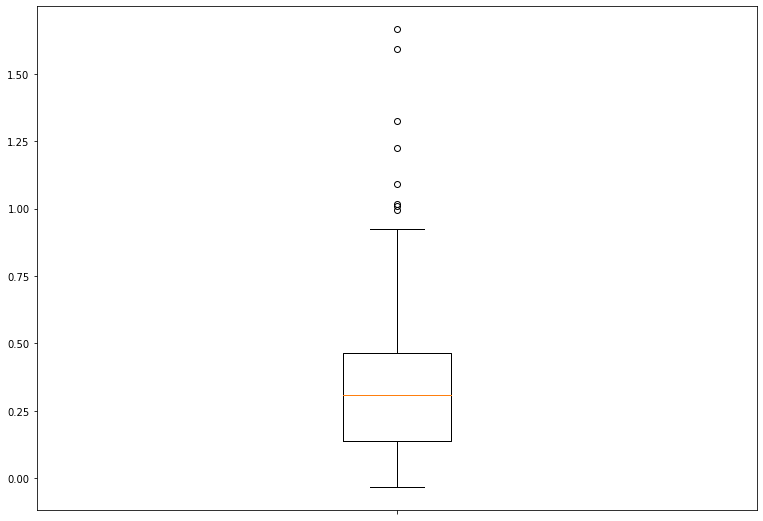

In [1514]:
data = df_multsells['valorization per day']
 
fig = plt.figure(figsize =(10, 7))
 
# Criando as instâncias do axis
ax = fig.add_axes([0, 0, 1, 1])
 
# Criando o boxplot
bp = ax.boxplot(data)

# Tirando os ticks
plt.xticks([1], [''])

 
# Imprimindo
plt.show()

In [1515]:
df_multsells['valorization per day'].describe()

count    177.000000
mean       0.346593
std        0.298905
min       -0.033305
25%        0.138000
50%        0.309419
75%        0.462949
max        1.664811
Name: valorization per day, dtype: float64

> Agora faremos a organização por ordem decrescente de valorização diária o dataset de imóveis com múltiplas vendas, a fim de verificar as maiores (topo da tabela abaixo) e menores (últimos 5 itens da tabela abaixo) valorizações.

In [1516]:
df_multsells.sort_values(by='valorization per day', axis=0, ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
10253,2422049104,2014-09-15,2014-12-30,106,85000.0,235000.0,150000.0,176.47,1.664811,283.132530,...,0,3,6,1939,0,98032,47.3813,-122.243,Kent,9.444444
15810,7129304540,2014-12-20,2015-05-14,145,133000.0,440000.0,307000.0,230.83,1.591931,307.692308,...,0,3,6,1947,0,98118,47.5192,-122.266,Seattle,23.750000
13628,2023049218,2014-07-16,2015-03-16,243,105500.0,445000.0,339500.0,321.80,1.324280,478.494624,...,0,1,5,1932,0,98148,47.4611,-122.324,Seattle,13.630491
12377,7899800045,2014-08-28,2014-12-02,96,107000.0,232900.0,125900.0,117.66,1.225625,255.934066,...,0,3,6,1973,0,98106,47.5238,-122.356,Seattle,20.898438
8274,3883800011,2014-11-05,2015-04-08,154,82000.0,219900.0,137900.0,168.17,1.092013,255.697674,...,0,3,6,1954,0,98146,47.4987,-122.341,Seattle,7.864953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2767603612,2014-05-12,2015-01-13,246,500000.0,489000.0,-11000.0,-2.20,-0.008943,379.069767,...,0,3,8,2007,0,98107,47.6719,-122.382,Seattle,374.812594
7845,4139420590,2014-05-20,2014-08-27,99,1212500.0,1200000.0,-12500.0,-1.03,-0.010404,263.157895,...,3,3,12,1995,0,98006,47.5521,-122.115,Bellevue,72.853452
15277,2619920170,2014-10-01,2014-12-19,79,772500.0,765000.0,-7500.0,-0.97,-0.012278,236.842105,...,0,3,9,2004,0,98033,47.6874,-122.161,Kirkland,180.069930
13298,7167000040,2014-08-13,2015-03-05,204,740000.0,700000.0,-40000.0,-5.41,-0.026520,208.955224,...,0,3,10,2004,0,98010,47.3602,-121.988,Black Diamond,3.713871


In [1517]:
df_multsells.describe()

,id,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,price_for_area_lot
count,1.770000e+02,177.000000,1.770000e+02,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,4.524131e+09,182.299435,3.509402e+05,4.866622e+05,135722.039548,56.429774,0.346593,287.172210,1740.169492,11634.785311,0.135593,3.293785,7.067797,1959.706215,44.734463,98087.327684,47.547471,-122.238045,50.361840
std,2.881247e+09,67.597956,2.871909e+05,2.869666e+05,100640.411498,46.706618,0.298905,121.142505,757.224653,22800.400149,0.660345,0.701958,1.175475,25.560392,295.033170,57.045785,0.133713,0.130511,52.002502
min,1.000102e+06,61.000000,8.200000e+04,1.240000e+05,-40000.000000,-5.410000,-0.033305,114.814815,580.000000,1092.000000,0.000000,1.000000,5.000000,1900.000000,0.000000,98001.000000,47.272900,-122.463000,3.713871
25%,1.974300e+09,126.000000,1.800000e+05,3.000000e+05,65000.000000,23.110000,0.138000,201.683502,1220.000000,5546.000000,0.000000,3.000000,6.000000,1943.000000,0.000000,98034.000000,47.460800,-122.337000,20.223976
50%,4.031001e+09,177.000000,2.600000e+05,4.199500e+05,115450.000000,54.320000,0.309419,257.608696,1600.000000,7980.000000,0.000000,3.000000,7.000000,1959.000000,0.000000,98077.000000,47.542700,-122.284000,33.043478
75%,7.409700e+09,233.000000,4.100000e+05,5.850000e+05,199000.000000,73.870000,0.462949,341.025641,2080.000000,10080.000000,0.000000,4.000000,7.000000,1978.000000,0.000000,98133.000000,47.673600,-122.172000,61.704955
max,9.834201e+09,315.000000,1.895000e+06,1.940000e+06,529950.000000,321.800000,1.664811,810.138889,5290.000000,224442.000000,4.000000,5.000000,12.000000,2013.000000,1990.000000,98199.000000,47.773700,-121.734000,374.812594


# Iniciando rateio dos melhores imóveis para investimento

In [1518]:
df_valorizados = df_multsells.loc[df_multsells['valorization per day'] > 0.309419]
df_valorizados

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
93,6021501535,2014-07-25,2014-12-23,151,430000.0,700000.0,270000.0,62.79,0.415828,443.037975,...,0,3,8,1939,0,98117,47.6870,-122.386,Seattle,86.000000
371,2231500030,2014-10-01,2015-03-24,174,315000.0,530000.0,215000.0,68.25,0.392241,243.119266,...,0,5,7,1954,0,98133,47.7711,-122.341,Seattle,29.291426
717,8820903380,2014-07-28,2015-01-02,158,452000.0,730000.0,278000.0,61.50,0.389241,274.436090,...,0,3,7,1937,1990,98125,47.7142,-122.286,Seattle,33.286693
823,726049190,2014-10-02,2015-02-18,139,287500.0,431000.0,143500.0,49.91,0.359065,238.121547,...,0,4,7,1954,0,98133,47.7493,-122.351,Seattle,39.930556
1202,1231000510,2014-09-22,2015-05-04,224,263000.0,510000.0,247000.0,93.92,0.419286,342.281879,...,0,3,6,1913,0,98118,47.5554,-122.270,Seattle,69.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17580,1423049019,2014-05-23,2015-03-31,312,90000.0,220000.0,130000.0,144.44,0.462949,379.310345,...,0,3,5,1943,0,98178,47.4852,-122.251,Seattle,12.000000
18564,7657000540,2014-09-02,2015-03-04,183,165000.0,260000.0,95000.0,57.58,0.314645,213.114754,...,0,3,6,1944,0,98178,47.4924,-122.237,Seattle,20.676692
18703,3558900590,2014-11-25,2015-03-24,119,360000.0,692500.0,332500.0,92.36,0.776134,310.538117,...,0,3,7,1969,0,98034,47.7089,-122.201,Kirkland,35.714286
19335,6021500970,2014-05-28,2015-04-07,314,345000.0,874950.0,529950.0,153.61,0.489204,810.138889,...,0,3,7,1940,0,98117,47.6902,-122.387,Seattle,86.250000


## Eliminando os imóveis que tiveram dasvalorização

* O dataframe acima contém apenas os imóveis com o terceiro quartil de valorização (os 25% mais valorizados).

In [1519]:
import plotly.express as px

fig = px.density_mapbox(df_valorizados, lat='lat', lon='long', z='valorization per day', radius=20,
                        center=dict(lat=df_valorizados["lat"].mean(), lon=df_valorizados["long"].mean()), zoom=7,
                        mapbox_style="stamen-terrain")
fig.show()

## Estipulando o intervalo de preço mínimo do nosso perfil de imóvel:

In [1520]:
df_valorizados.describe()

,id,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,price_for_area_lot
count,8.800000e+01,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,4.406274e+09,160.477273,228559.261364,413084.75000,184525.488636,86.517500,0.563825,285.662262,1528.636364,8534.909091,0.022727,3.227273,6.738636,1954.136364,22.613636,98090.681818,47.528064,-122.269443,31.242576
std,2.848205e+09,58.140531,97027.107788,167950.17472,93605.191673,45.111489,0.271354,124.060178,523.118812,3246.942277,0.213201,0.673424,0.734914,22.773842,212.134713,57.875917,0.143431,0.101844,20.899122
min,1.230393e+08,62.000000,82000.000000,175000.00000,45000.000000,20.000000,0.313289,141.142857,580.000000,3800.000000,0.000000,1.000000,5.000000,1900.000000,0.000000,98001.000000,47.272900,-122.393000,7.864953
25%,1.946330e+09,119.000000,159250.000000,265962.50000,114950.000000,61.497500,0.391491,197.089840,1147.500000,7114.750000,0.000000,3.000000,6.000000,1942.250000,0.000000,98034.000000,47.423950,-122.341500,17.758881
50%,3.957400e+09,152.500000,206662.500000,378000.00000,153000.000000,73.495000,0.470720,256.655152,1505.000000,8132.000000,0.000000,3.000000,7.000000,1957.500000,0.000000,98106.000000,47.504200,-122.294000,25.164640
75%,7.153928e+09,195.750000,274375.000000,540500.00000,249000.000000,97.322500,0.651065,342.074615,1862.500000,9657.000000,0.000000,3.000000,7.000000,1969.000000,0.000000,98133.000000,47.668250,-122.219000,35.719194
max,9.834200e+09,314.000000,481000.000000,874950.00000,529950.000000,321.800000,1.664811,810.138889,3500.000000,21303.000000,2.000000,5.000000,8.000000,1996.000000,1990.000000,98198.000000,47.773700,-121.771000,107.151757


In [1521]:
filter_price = df_valorizados['price'] >= 	df_valorizados['price'].quantile(0.25)
filter_price2 = df_valorizados['price'] <= 	df_valorizados['price'].quantile(0.75)

## Estipulando a quantidade de quartos do nosso perfil de imóvel bem valorizado:

Estipulando o valor de condição do nosso perfil:

In [1535]:
filter_condition = df_valorizados['condition'] > 3

Definindo o valor do parâmetro "grade" do perfil de imóvel com potencial de valorização.

In [1537]:
filter_grade = df_valorizados['grade'] > 6

Definindo o valor do parâmetro "view" do perfil de imóvel com potencial de valorização.

In [1538]:
df_valor_filtrado = df_valorizados[filter_price & filter_price2 & filter_condition & filter_grade]

df_valor_filtrado.sort_values(by='price', ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
10221,3293700496,2014-08-14,2014-12-04,112,270000.0,450000.0,180000.0,66.67,0.595268,243.243243,...,0,5,7,1956,0,98133,47.7481,-122.355,Seattle,34.928849
2502,1781500435,2014-08-20,2015-02-25,189,260000.0,575000.0,315000.0,121.15,0.641005,363.924051,...,0,5,7,1911,0,98126,47.5256,-122.380,Seattle,35.403050
12030,7230400400,2014-09-26,2015-03-26,181,240000.0,415500.0,175500.0,73.12,0.403978,340.573770,...,0,4,7,1980,0,98059,47.4712,-122.100,Renton,13.596193
8630,5127001320,2014-11-25,2015-02-23,90,190000.0,314950.0,124950.0,65.76,0.730667,207.203947,...,0,4,7,1967,0,98059,47.4730,-122.149,Renton,19.791667
12434,1217000340,2014-06-06,2015-02-19,258,185000.0,340000.0,155000.0,83.78,0.324729,184.782609,...,0,4,7,1953,0,98166,47.4550,-122.350,Seattle,22.839506
17133,6143000020,2014-10-27,2015-04-06,161,175000.0,299000.0,124000.0,70.86,0.440124,156.544503,...,0,4,8,1963,0,98001,47.3095,-122.283,Auburn,10.292301


In [1540]:
df_melhores = df_valor_filtrado.sort_values(by=['valorization per day'], ascending=False)
df_melhores.head(5)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
8630,5127001320,2014-11-25,2015-02-23,90,190000.0,314950.0,124950.0,65.76,0.730667,207.203947,...,0,4,7,1967,0,98059,47.4730,-122.149,Renton,19.791667
2502,1781500435,2014-08-20,2015-02-25,189,260000.0,575000.0,315000.0,121.15,0.641005,363.924051,...,0,5,7,1911,0,98126,47.5256,-122.380,Seattle,35.403050
10221,3293700496,2014-08-14,2014-12-04,112,270000.0,450000.0,180000.0,66.67,0.595268,243.243243,...,0,5,7,1956,0,98133,47.7481,-122.355,Seattle,34.928849
17133,6143000020,2014-10-27,2015-04-06,161,175000.0,299000.0,124000.0,70.86,0.440124,156.544503,...,0,4,8,1963,0,98001,47.3095,-122.283,Auburn,10.292301
12030,7230400400,2014-09-26,2015-03-26,181,240000.0,415500.0,175500.0,73.12,0.403978,340.573770,...,0,4,7,1980,0,98059,47.4712,-122.100,Renton,13.596193


In [1544]:
import plotly.express as px

fig = px.density_mapbox(df_melhores, lat='lat', lon='long', z='valorization per day', radius=20,
                        center=dict(lat=df_melhores["lat"].mean(), lon=df_melhores["long"].mean()), zoom=7,
                        mapbox_style="stamen-terrain")
fig.show()

# Iniciando rateios dos piores imóveis para investimento

In [1546]:
df_desvalorizados = df_multsells.loc[df_multsells['valorization per day'] < 0]
df_desvalorizados

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
836,8682262400,2014-07-18,2015-05-13,299,430000.0,419950.0,-10050.0,-2.34,-0.007826,311.074074,...,0,3,8,2004,0,98053,47.7176,-122.033,Redmond,107.419435
5592,2726049071,2014-12-11,2015-04-08,118,510000.0,489950.0,-20050.0,-3.93,-0.033305,597.500000,...,0,3,5,1949,0,98125,47.7076,-122.284,Seattle,121.255350
7845,4139420590,2014-05-20,2014-08-27,99,1212500.0,1200000.0,-12500.0,-1.03,-0.010404,263.157895,...,3,3,12,1995,0,98006,47.5521,-122.115,Bellevue,72.853452
10610,2767603612,2014-05-12,2015-01-13,246,500000.0,489000.0,-11000.0,-2.20,-0.008943,379.069767,...,0,3,8,2007,0,98107,47.6719,-122.382,Seattle,374.812594
13298,7167000040,2014-08-13,2015-03-05,204,740000.0,700000.0,-40000.0,-5.41,-0.026520,208.955224,...,0,3,10,2004,0,98010,47.3602,-121.988,Black Diamond,3.713871
15277,2619920170,2014-10-01,2014-12-19,79,772500.0,765000.0,-7500.0,-0.97,-0.012278,236.842105,...,0,3,9,2004,0,98033,47.6874,-122.161,Kirkland,180.069930


In [1548]:
df_desvalorizados[df_desvalorizados['price difference']<0].head(5)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
836,8682262400,2014-07-18,2015-05-13,299,430000.0,419950.0,-10050.0,-2.34,-0.007826,311.074074,...,0,3,8,2004,0,98053,47.7176,-122.033,Redmond,107.419435
5592,2726049071,2014-12-11,2015-04-08,118,510000.0,489950.0,-20050.0,-3.93,-0.033305,597.500000,...,0,3,5,1949,0,98125,47.7076,-122.284,Seattle,121.255350
7845,4139420590,2014-05-20,2014-08-27,99,1212500.0,1200000.0,-12500.0,-1.03,-0.010404,263.157895,...,3,3,12,1995,0,98006,47.5521,-122.115,Bellevue,72.853452
10610,2767603612,2014-05-12,2015-01-13,246,500000.0,489000.0,-11000.0,-2.20,-0.008943,379.069767,...,0,3,8,2007,0,98107,47.6719,-122.382,Seattle,374.812594
13298,7167000040,2014-08-13,2015-03-05,204,740000.0,700000.0,-40000.0,-5.41,-0.026520,208.955224,...,0,3,10,2004,0,98010,47.3602,-121.988,Black Diamond,3.713871
